In [1]:
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import to_categorical, plot_model 

import matplotlib.pyplot as plt
import numpy as np

In [2]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

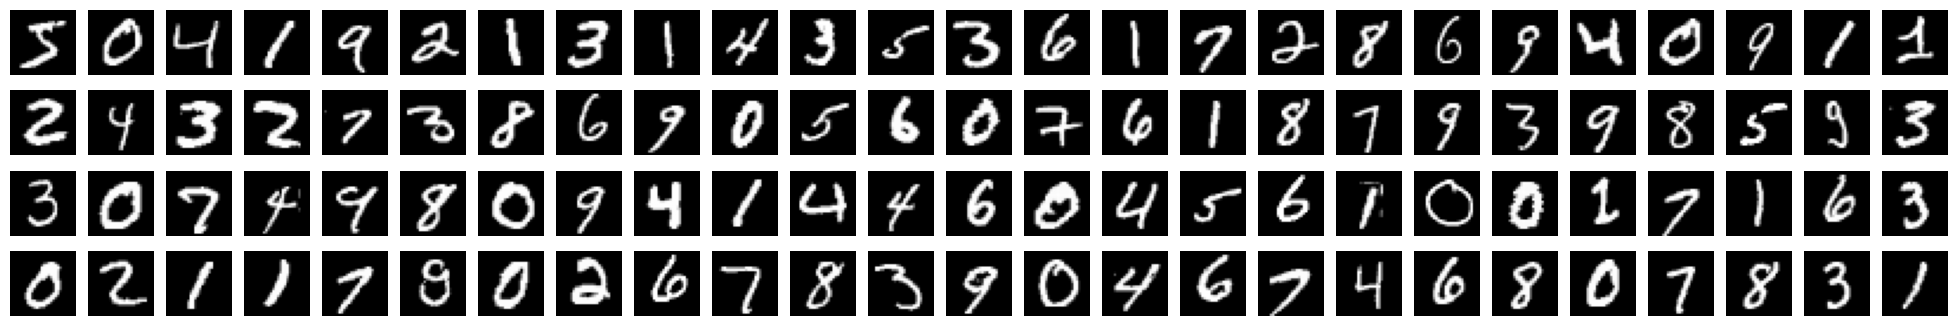

In [3]:
plt.figure(figsize=(25, 4))
for i in range(4):
    for j in range(25):
        k = i * 25 + j
        plt.subplot(4, 25, k + 1)
        plt.imshow(X_train[k], cmap=plt.get_cmap('gray'))
        plt.axis('off')

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [6]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
X_train_2d = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_test_2d = X_test.reshape(X_test.shape[0], 784).astype('float32')

In [8]:
model.fit(X_train_2d, y_train, epochs=30, batch_size=32, verbose=2)

Epoch 1/30
1875/1875 - 13s - 7ms/step - accuracy: 0.9017 - loss: 0.3316
Epoch 2/30
1875/1875 - 10s - 5ms/step - accuracy: 0.9546 - loss: 0.1528
Epoch 3/30
1875/1875 - 11s - 6ms/step - accuracy: 0.9652 - loss: 0.1152
Epoch 4/30
1875/1875 - 9s - 5ms/step - accuracy: 0.9715 - loss: 0.0923
Epoch 5/30
1875/1875 - 9s - 5ms/step - accuracy: 0.9765 - loss: 0.0762
Epoch 6/30
1875/1875 - 11s - 6ms/step - accuracy: 0.9788 - loss: 0.0669
Epoch 7/30
1875/1875 - 11s - 6ms/step - accuracy: 0.9820 - loss: 0.0564
Epoch 8/30
1875/1875 - 10s - 5ms/step - accuracy: 0.9839 - loss: 0.0503
Epoch 9/30
1875/1875 - 11s - 6ms/step - accuracy: 0.9859 - loss: 0.0440
Epoch 10/30
1875/1875 - 8s - 4ms/step - accuracy: 0.9880 - loss: 0.0378
Epoch 11/30
1875/1875 - 12s - 7ms/step - accuracy: 0.9884 - loss: 0.0353
Epoch 12/30
1875/1875 - 11s - 6ms/step - accuracy: 0.9901 - loss: 0.0317
Epoch 13/30
1875/1875 - 10s - 6ms/step - accuracy: 0.9907 - loss: 0.0288
Epoch 14/30
1875/1875 - 9s - 5ms/step - accuracy: 0.9915 - loss

In [9]:
loss, accuracy = model.evaluate(X_test_2d, y_test, verbose=0)
print("Accuracy on test data: %.4f" % accuracy)

Accuracy on test data: 0.9729


In [10]:
pred_y_test_prob = model.predict(X_test_2d)
pred_y_test = np.argmax(pred_y_test_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


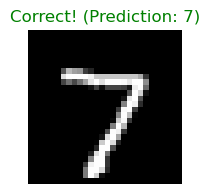

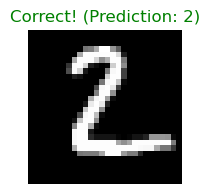

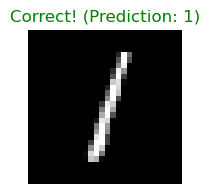

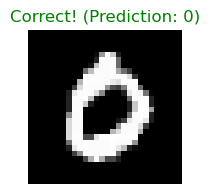

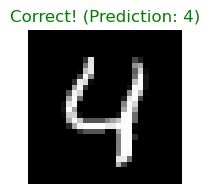

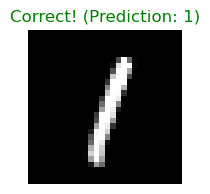

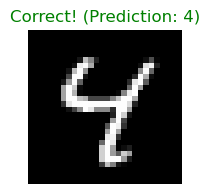

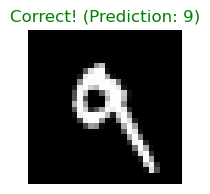

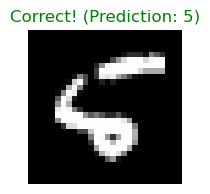

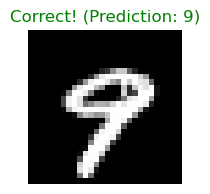

In [11]:
for i in range(10):
    pred = pred_y_test[i]
    real = y_test[i]
    
    if pred == real:
        color_title = 'green'
        message = f"Correct! (Prediction: {pred})"
    else:
        color_title = 'red'
        message = f"ERROR! Prediction: {pred} | Real: {real}"
    plt.figure(figsize=(2, 2)) 
    plt.imshow(X_test[i], cmap='gray') 
    plt.title(message, color=color_title)
    plt.axis('off') 
    plt.show()

In [12]:
#CNN
 #Because of the images being in black and white, we have one colour layer 
X_train_4d = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') X_test_4d = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [13]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model.add(Conv2D(filters=10, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(X_train_4d, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
1875/1875 - 26s - 14ms/step - accuracy: 0.9503 - loss: 0.1736
Epoch 2/20
1875/1875 - 21s - 11ms/step - accuracy: 0.9801 - loss: 0.0639
Epoch 3/20
1875/1875 - 13s - 7ms/step - accuracy: 0.9855 - loss: 0.0456
Epoch 4/20
1875/1875 - 13s - 7ms/step - accuracy: 0.9891 - loss: 0.0331
Epoch 5/20
1875/1875 - 13s - 7ms/step - accuracy: 0.9917 - loss: 0.0259
Epoch 6/20
1875/1875 - 13s - 7ms/step - accuracy: 0.9929 - loss: 0.0216
Epoch 7/20
1875/1875 - 15s - 8ms/step - accuracy: 0.9948 - loss: 0.0161
Epoch 8/20
1875/1875 - 13s - 7ms/step - accuracy: 0.9959 - loss: 0.0129
Epoch 9/20
1875/1875 - 20s - 11ms/step - accuracy: 0.9963 - loss: 0.0112
Epoch 10/20
1875/1875 - 18s - 9ms/step - accuracy: 0.9970 - loss: 0.0095
Epoch 11/20
1875/1875 - 20s - 11ms/step - accuracy: 0.9971 - loss: 0.0084
Epoch 12/20
1875/1875 - 20s - 11ms/step - accuracy: 0.9978 - loss: 0.0064
Epoch 13/20
1875/1875 - 18s - 10ms/step - accuracy: 0.9978 - loss: 0.0065
Epoch 14/20
1875/1875 - 22s - 12ms/step - accuracy: 0.

In [16]:
loss, accuracy = model.evaluate(X_test_4d, y_test, verbose=0)
print("Accuracy on test data: %.4f" % accuracy)

Accuracy on test data: 0.9876


In [17]:
pred_y_test_prob = model.predict(X_test_4d)
pred_y_test = np.argmax(pred_y_test_prob, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


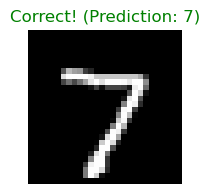

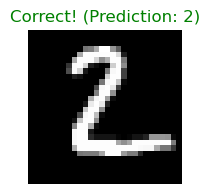

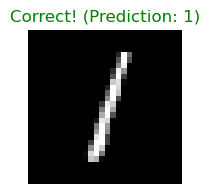

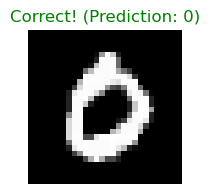

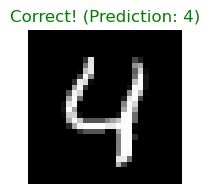

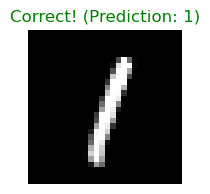

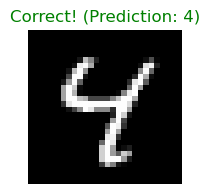

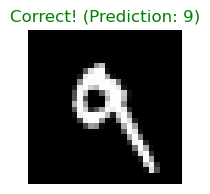

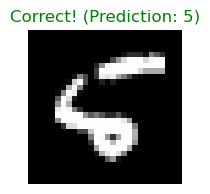

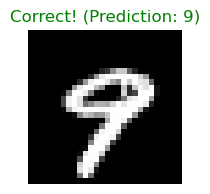

In [18]:
for i in range(10):
    pred = pred_y_test[i]
    real = y_test[i]
    
    if pred == real:
        color_title = 'green'
        message = f"Correct! (Prediction: {pred})"
    else:
        color_title = 'red'
        message = f"ERROR! Prediction: {pred} | Real: {real}"
    plt.figure(figsize=(2, 2)) 
    plt.imshow(X_test[i], cmap='gray') 
    plt.title(message, color=color_title)
    plt.axis('off') 
    plt.show()